In [3]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

In [5]:
#read_csv() takes the path of the csv file using pandas pd.read_csv() convert csv into dataframe
car_data = pd.read_csv('/content/car_data.csv')

#head() is used to display the first 5 rows of the dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#info() provides summary of the information present in dataframe
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#sum of null values for each column
car_data.isnull().sum()
#Describe the statistical values
car_data.describe()
#Returns the list of columns
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#to count the varieties and print
print("---------------------------")
print(car_data['Fuel_Type'].value_counts())
print("---------------------------")
print(car_data['Seller_Type'].value_counts())
print("---------------------------")
print(car_data['Transmission'].value_counts())
print("---------------------------")

---------------------------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
---------------------------


In [9]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [11]:
from matplotlib import style

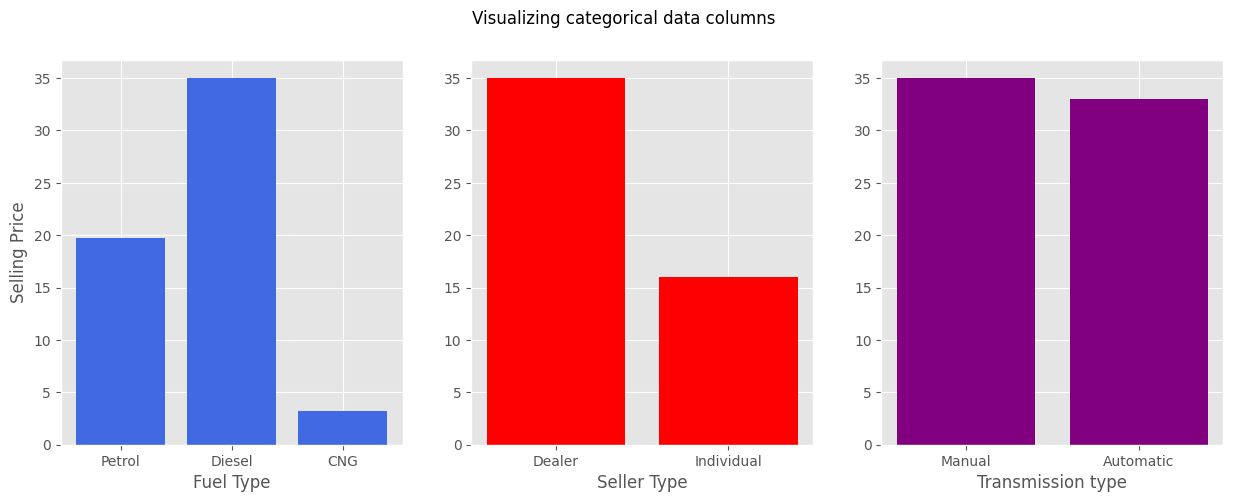

In [12]:
# Set the style of the plot to 'ggplot' for a specific visual style.
style.use('ggplot')

# Create a figure with a specified size.
fig = plt.figure(figsize=(15,5))

# Set the overall title for the figure.
fig.suptitle('Visualizing categorical data columns')

# Create the first subplot in a 1x3 grid.
plt.subplot(1,3,1)

# Create a bar plot for fuel_type against selling_price with a specified color.
plt.bar(fuel_type, selling_price, color='royalblue')

# Set labels for the x and y axes.
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")

# Create the second subplot in a 1x3 grid.
plt.subplot(1,3,2)

# Create a bar plot for seller_type against selling_price with a specified color.
plt.bar(seller_type, selling_price, color='red')

# Set labels for the x axis.
plt.xlabel("Seller Type")

# Create the third subplot in a 1x3 grid.
plt.subplot(1,3,3)

# Create a bar plot for transmission_type against selling_price with a specified color.
plt.bar(transmission_type, selling_price, color='purple')

# Set label for the x axis.
plt.xlabel('Transmission type')

# Display the plot.
plt.show()

In [13]:
#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


<ipython-input-14-c7b23842a19e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


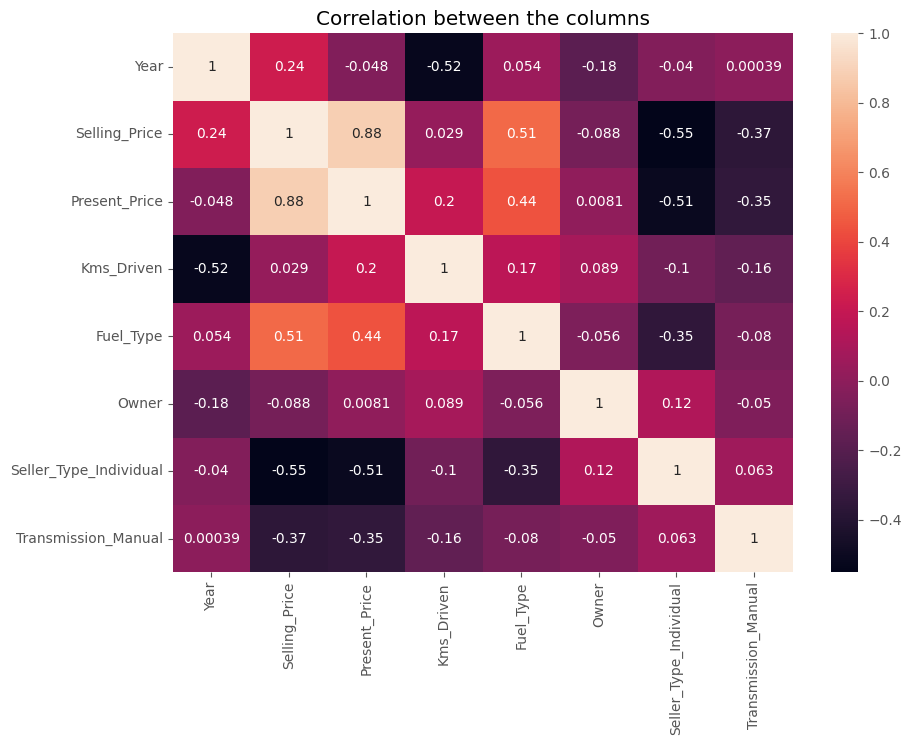

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

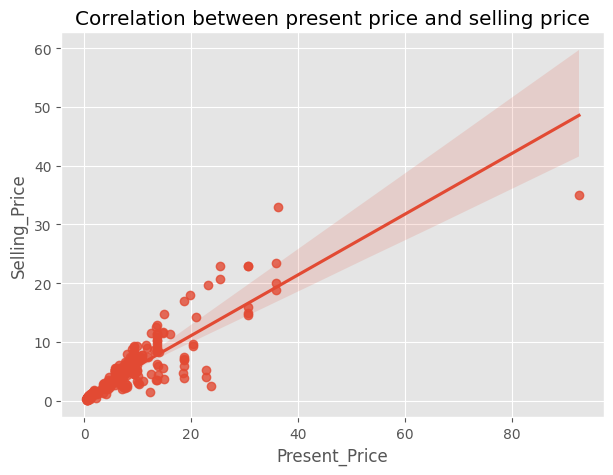

In [15]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

In [16]:
#cretaing dependent and independent variables. y has the dependent variable
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

#shape() tells the rows and columns
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [17]:
#train test split of data
#x holds independent variables for training and testing
#y hold dependent variable for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LinearRegression()
#fit() is used to train the model using the data given as parameters to it
model.fit(X_train, y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)

In [22]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.258140470647337
MSE:  3.493286026225147
R2 score:  0.8294933369778817


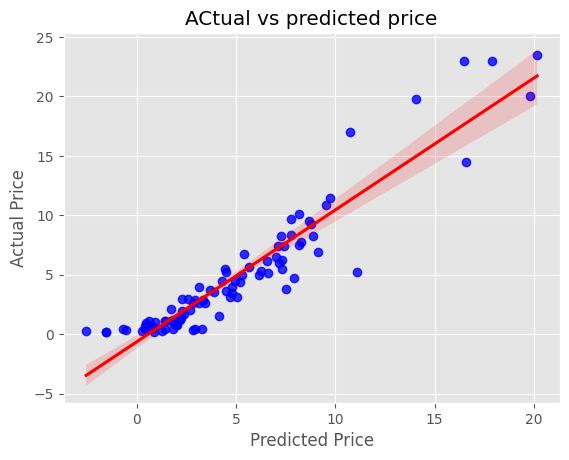

In [23]:
sns.regplot(x=pred, y=y_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [25]:
# Create input widgets for different types of features
year_widget = widgets.IntSlider(description='Year:', min=1970, max=2023, step=1, value=2010)
present_price_widget = widgets.FloatSlider(description='Present Price:', min=0.2, max=100, step=0.1, value=9.83)
kilometer_driven_widget = widgets.IntSlider(description='Kilometer Driven:', min=1000, max=100000, step=1000, value=2071)
fuel_type_widget = widgets.Dropdown(description='Fuel Type:', options=['Petrol', 'Diesel', 'CNG'], value='Petrol')
owner_widget = widgets.Dropdown(description='Owner:', options=['First', 'Second', 'Third'], value='First')
seller_type_widget = widgets.Dropdown(description='Seller Type:', options=['Individual', 'Dealer'], value='Individual')
transmission_widget = widgets.Dropdown(description='Transmission:', options=['Manual', 'Automatic'], value='Manual')

# Function to get input values and make a prediction
def make_prediction(button):
    fuel_type_encoded = 0 if fuel_type_widget.value == 'Petrol' else 1 if fuel_type_widget.value == 'Diesel' else 3
    owner_encoded = 0 if owner_widget.value == 'First' else 1 if owner_widget.value == 'Second' else 2
    seller_type_encoded = 0 if seller_type_widget.value == 'Individual' else 1
    transmission_encoded = 0 if transmission_widget.value == 'Manual' else 1

    new_data_point = [
        [year_widget.value, present_price_widget.value, kilometer_driven_widget.value,
         fuel_type_encoded, owner_encoded, seller_type_encoded, transmission_encoded]
    ]
    prediction = model.predict(new_data_point)
    print("Selling Price in Lakhs:", prediction)

# Create a button to trigger the prediction
predict_button = widgets.Button(description='Predict')
predict_button.on_click(make_prediction)

# Display the input widgets and the button
display(year_widget, present_price_widget, kilometer_driven_widget,
        fuel_type_widget, owner_widget, seller_type_widget, transmission_widget,
        predict_button)

IntSlider(value=2010, description='Year:', max=2023, min=1970)

FloatSlider(value=9.83, description='Present Price:', min=0.2)

IntSlider(value=2071, description='Kilometer Driven:', max=100000, min=1000, step=1000)

Dropdown(description='Fuel Type:', options=('Petrol', 'Diesel', 'CNG'), value='Petrol')

Dropdown(description='Owner:', options=('First', 'Second', 'Third'), value='First')

Dropdown(description='Seller Type:', options=('Individual', 'Dealer'), value='Individual')

Dropdown(description='Transmission:', options=('Manual', 'Automatic'), value='Manual')

Button(description='Predict', style=ButtonStyle())

Selling Price in Lakhs: [905.52802092]
Selling Price in Lakhs: [-9065.86036546]
Selling Price in Lakhs: [934.76084668]
